<a href="https://colab.research.google.com/github/obeabi/TorchStudy/blob/main/Main_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classifier for MNIST Dataset (ConvNet)
# Written by Abiola Obembe
## Date: 2020-12-19


For this tutorial, we will use the MNIST dataset. It has 10 classes 0 -10 

## Step 1: Load and Normalize the dataset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Import complete!")

Import complete!


In [2]:
num_workers = 0
batch_size = 20
valid_size = 0.2

transform = transforms.Compose([transforms.ToTensor()])

#transform = transforms.Compose(
#    [transforms.ToTensor(),
#    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

num_train = len(trainset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)



testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,num_workers=num_workers, shuffle=False)

print(trainset)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [3]:
# eXAMINE SIZE OF DATATETS
print(len(trainset))
print(len(testset))

60000
10000


In [4]:
#We then simply, obtain one batch of images for training using iter.
dataiter = iter(trainloader)
images, labels = dataiter.next()
images = images.numpy()

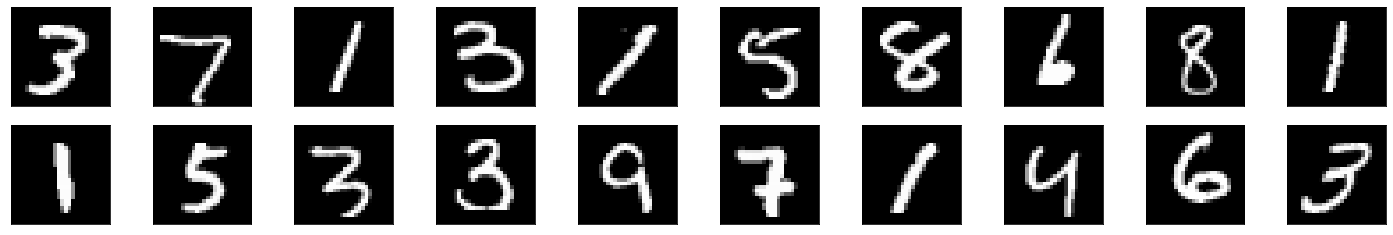

In [5]:
fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')

plt.show()

## Step 2: Define a CNN 

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.dropout = nn.Dropout(0.2)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1)
        self.dropout = nn.Dropout(0.2)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
      
    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = (F.relu(self.conv1(xb)))
        xb = self.dropout(xb)
        xb = (F.relu(self.conv2(xb)))
        xb = self.dropout(xb)
        xb = (F.relu(self.conv3(xb)))
        xb = F.avg_pool2d(xb, 4)
       
     
        return xb.view(-1, xb.size(1))
        


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (dropout): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


## Step 3 : Define a Loss Function and Optimizer




In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Step 4: Train the Network

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.254
[2,  2000] loss: 0.644
[3,  2000] loss: 0.485
[4,  2000] loss: 0.420
[5,  2000] loss: 0.380
[6,  2000] loss: 0.352
[7,  2000] loss: 0.331
[8,  2000] loss: 0.320
[9,  2000] loss: 0.305
[10,  2000] loss: 0.300
Finished Training


## Step 5: Save Model

In [9]:
PATH = './minst_net.pth'
torch.save(net.state_dict(), PATH)

## Step 6: Test Model on Test Set

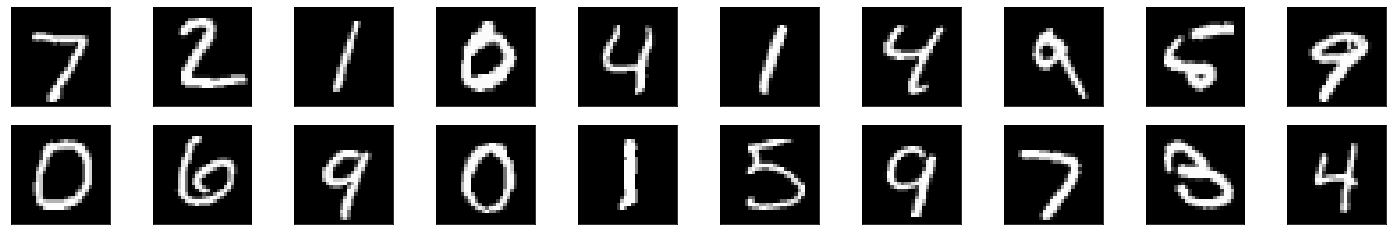

GroundTruth:      7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4


In [11]:
# Display random Image
#We then simply, obtain one batch of images for training using iter.
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')

plt.show()

classes = ('0','1','2','3','4','5','6','7','8','9')
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(20)))

In [12]:
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 91 %


## Step 7: Investigating Model Performance

In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 96 %
Accuracy of     1 : 97 %
Accuracy of     2 : 90 %
Accuracy of     3 : 94 %
Accuracy of     4 : 87 %
Accuracy of     5 : 85 %
Accuracy of     6 : 93 %
Accuracy of     7 : 94 %
Accuracy of     8 : 85 %
Accuracy of     9 : 87 %


In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu
